In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


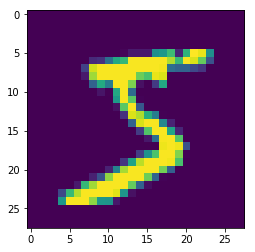

In [11]:
import matplotlib.pyplot as plt
#print(x_train[0])
print(y_train[0])

plt.imshow(x_train[0])

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
            

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

callback = myCallback()
model.fit(x_train, y_train, epochs=10, callbacks=[callback])

Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2573 - acc: 0.9275
Epoch 2/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1135 - acc: 0.9662
Epoch 3/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0787 - acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0584 - acc: 0.9827
Epoch 5/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0453 - acc: 0.9863
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0344 - acc: 0.9890
Epoch 7/10
59360/60000 [============================>.] - ETA: 0s - loss: 0.0277 - acc: 0.9915
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 5s 85us/step - loss: 0.0278 - acc: 0.9914


In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 38us/step


[0.07023902854406042, 0.9793]